# Evaluating a Classification Model

Based on Machine Learning Practices by Kevin Markham

### Review of model evaluation¶
- Need a way to choose between models: different model types, tuning parameters, and features
- Use a model evaluation procedure to estimate how well a model will generalize to out-of-sample data
- Requires a model evaluation metric to quantify the model performance

### Model evaluation procedures

#### 1. Training and testing on the same data
- Rewards overly complex models that __"overfit"__ the training data and won't necessarily generalize

#### 2. Train/test split
- Split the dataset into two pieces, so that the model can be trained and tested on different data
- __Better estimate of out-of-sample__ performance, but still a "high variance" estimate
- Useful due to its speed, simplicity, and flexibility

#### 3. K-fold cross-validation
- Systematically create "K" train/test splits and average the results together
- __Even better estimate of out-of-sample__ performance
- Runs "K" times slower than train/test split

#### 4. Parameter Tuning of an estimator
- GridSearchCV

### Model evaluation metrics
- __Regression problems:__ Mean Absolute Error, Mean Squared Error, Root Mean Squared Error
- __Classification problems:__ Classification accuracy and ...
    1. Classification Accuracy.
    2. Confusion Matrix.
    3. Area Under ROC Curve.
    4. Logarithmic Loss.
    5. Classification Report.

## 1. Classification Accuracy

Dataset: Pima Indian Diabetes Dataset

Using Logistic Regression CLA

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
pwd

'/home/dsc/Repos/MasterDataScience/06_Machine_Learning_on_my_own'

In [38]:
# Reading the Dataset

pima = pd.read_csv('./Files/diabetes.csv')
pima.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
643,4,90,0,0,0,28.0,0.610,31,0
386,5,116,74,29,0,32.3,0.660,35,1
462,8,74,70,40,49,35.3,0.705,39,0
85,2,110,74,29,125,32.4,0.698,27,0
288,4,96,56,17,49,20.8,0.340,26,0


In [42]:
# Changing Column names

pima = pd.read_csv('./Files/diabetes.csv')
pima.columns = ['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [43]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnant    768 non-null int64
glucose     768 non-null int64
bp          768 non-null int64
skin        768 non-null int64
insulin     768 non-null int64
bmi         768 non-null float64
pedigree    768 non-null float64
age         768 non-null int64
label       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [44]:
# Selecting X and y

X = pima[['pregnant','insulin','bmi','age']]
y = pima['label']

In [45]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0) 

In [46]:
# Importing Model

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [47]:
# Instantiating the model and fitting it

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
# Predicting the data through X_test

y_pred_class = logreg.predict(X_test)

___Classification Accuracy:___ Percentage of correct predictions

In [50]:
from sklearn import metrics 
metrics.accuracy_score(y_test, y_pred_class) 

0.6927083333333334

In [51]:
logreg.score(X_test,y_test) 

0.6927083333333334

___Null Accuracy:___ Accuracy thath could be achieved by always predicting the most frequent class

In [54]:
y_test.value_counts()

0    130
1     62
Name: label, dtype: int64

In [58]:
# Percentage of ONES

y_test.mean()

0.3229166666666667

In [59]:
# Percentage of ZEROS

1-y_test.mean()

0.6770833333333333

In [60]:
# Null Accuracy for binary problems (0 1 coded)

max(y_test.mean(), 1 - y_test.mean())

0.6770833333333333

In [61]:
# calculate null accuracy (for multi-class classification problems)

y_test.value_counts().head(1) / len(y_test)

0    0.677083
Name: label, dtype: float64

Comparing the true and predicted response values

In [67]:
# Comparing the result between the test values and the predicted values

print('True:',y_test.values[0:25])
print('Pred:',y_pred_class[0:25])

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


#### Conclusion:

- Classification accuracy is the __easiest classification metric to understand__
- But, it does not tell you the underlying distribution of response values
- And, it does not tell you what "types" of errors your classifier is making

Si siempre elegimos la clase 0 tendremos un acierto (NULL ACCURACY) de __0.67708__ mientras que nuestro modelo tiene una precisión de __0.69270__

Esto habría que mejorarlo....

Por otra parte vemos que el modelo predice mejor los 0 que los 1...Para ver esto mejor debemos estudiar __Confusion Matrix__

## 2. Confusion Matrix

In [72]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,y_pred_class))
cm = metrics.confusion_matrix(y_test,y_pred_class)

[[118  12]
 [ 47  15]]


Confusion matrix, without normalization
[[118  12]
 [ 47  15]]


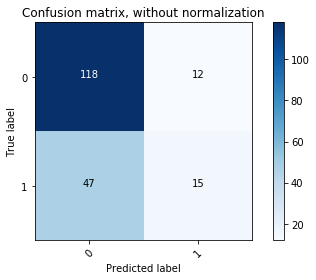

In [78]:
# From Scikit-Learn Documentation

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['0','1'],
                      title='Confusion matrix, without normalization')

plt.show()

![alt](Img/cm.png)

- Every observation in the testing set is represented in exactly one box
- It's a 2x2 matrix because there are 2 response classes
- The format shown here is not universal

Basic terminology

- True Positives (TP): we correctly predicted that they do have diabetes
- True Negatives (TN): we correctly predicted that they don't have diabetes
- False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error")
- False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error")

In [85]:
# save confusion matrix and slice into four pieces

confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [86]:
print(metrics.classification_report(y_test,y_pred_class))

             precision    recall  f1-score   support

          0       0.72      0.91      0.80       130
          1       0.56      0.24      0.34        62

avg / total       0.66      0.69      0.65       192



### Metrics computed from a confusion matrix

__Classification Accuracy__

In [87]:
from sklearn import metrics 
metrics.accuracy_score(y_test, y_pred_class) 

0.6927083333333334

In [89]:
(TP + TN) / float(TP + TN + FP + FN)

0.6927083333333334

__Classification Error:__ Misclassification Rate

In [90]:
1 - metrics.accuracy_score(y_test, y_pred_class) 

0.30729166666666663

In [91]:
(FP + FN) /float(TP + TN + FP + FN)

0.3072916666666667

__Sensitivity:__ True Positive Rate or Recall

In [92]:
from sklearn import metrics
metrics.recall_score(y_test,y_pred_class)

0.24193548387096775

In [95]:
TP/float(TP+FN)

0.24193548387096775

__Specificity:__  True Negative Rate

In [96]:
TN/float(TN+FP)

0.9076923076923077

__False Positive Rate:__

In [98]:
FP/float(FP + TN)

0.09230769230769231

__Precision:__ How precise is the classifier when predicting positive instances?

In [101]:
from sklearn import metrics
metrics.precision_score(y_test, y_pred_class)

0.5555555555555556

In [100]:
TP/float(TP + FP)

0.5555555555555556

__Conclusion:__
- Confusion matrix gives you a more complete picture of how your classifier is performing
- Also allows you to compute various classification metrics, and these metrics can guide your model selection

Which metrics should you focus on?

- Choice of metric depends on your business objective
- Spam filter (positive class is "spam"): Optimize for precision or specificity because false negatives (spam goes to the inbox) are more acceptable than false positives (non-spam is caught by the spam filter)
- Fraudulent transaction detector (positive class is "fraud"): Optimize for sensitivity because false positives (normal transactions that are flagged as possible fraud) are more acceptable than false negatives (fraudulent transactions that are not detected)

### Adjusting the classification threshold

In [102]:
# print the first 10 predicted responses
logreg.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [103]:
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(X_test)[0:10, :]

array([[0.63, 0.37],
       [0.72, 0.28],
       [0.71, 0.29],
       [0.59, 0.41],
       [0.84, 0.16],
       [0.83, 0.17],
       [0.5 , 0.5 ],
       [0.49, 0.51],
       [0.72, 0.28],
       [0.33, 0.67]])

In [104]:
# print the first 10 predicted probabilities for class 1
logreg.predict_proba(X_test)[0:10, 1]

array([0.37, 0.28, 0.29, 0.41, 0.16, 0.17, 0.5 , 0.51, 0.28, 0.67])

In [105]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [106]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

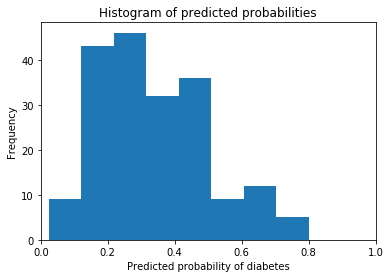

In [109]:
# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency');

__Decrease the threshold__ for predicting diabetes in order to __increase the sensitivity__ of the classifier

In [110]:
# predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.3)[0]

In [111]:
# print the first 10 predicted probabilities
y_pred_prob[0:10]

array([0.37, 0.28, 0.29, 0.41, 0.16, 0.17, 0.5 , 0.51, 0.28, 0.67])

In [112]:
# print the first 10 predicted classes with the lower threshold
y_pred_class[0:10]

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 1.])

In [113]:
# previous confusion matrix (default threshold of 0.5)
print(confusion)

[[118  12]
 [ 47  15]]


In [114]:
# new confusion matrix (threshold of 0.3)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[80 50]
 [16 46]]


In [115]:
# sensitivity has increased (used to be 0.24)
print(46 / float(46 + 16))

0.7419354838709677


In [116]:
# specificity has decreased (used to be 0.91)
print(80 / float(80 + 50))

0.6153846153846154


__Conclusion:__

- Threshold of 0.5 is used by default (for binary problems) to convert predicted probabilities into class predictions
- Threshold can be adjusted to increase sensitivity or specificity
- Sensitivity and specificity have an inverse relationship

## 3. ROC Curves and Area Under the Curve (AUC)
how can i see sensitivity and specificity being affected by various thresholds, without actually changing the threshold?

__Plot the ROC curve!__

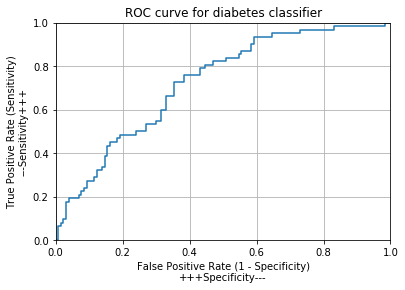

In [120]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)\n+++Specificity---')
plt.ylabel('True Positive Rate (Sensitivity)\n---Sensitivity+++')
plt.grid(True)

- ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context
- You can't actually see the thresholds used to generate the curve on the ROC curve itself

In [121]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [122]:
evaluate_threshold(0.5)

Sensitivity: 0.24193548387096775
Specificity: 0.9076923076923077


In [123]:
evaluate_threshold(0.3)

Sensitivity: 0.7258064516129032
Specificity: 0.6153846153846154


__AUC__ is the percentage of the ROC plot that is underneath the curve

In [125]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.7245657568238213


- AUC is useful as a single number summary of classifier performance.
- If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will assign a higher predicted probability to the positive observation.
- AUC is useful even when there is high class imbalance (unlike classification accuracy).

In [126]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.7378233618233618

__Confusion matrix advantages:__

- Allows you to calculate __a variety of metrics__
- Useful for __multi-class problems__ (more than two response classes)

__ROC/AUC advantages:__

- Does not require you to __set a classification threshold__
- Still useful when there is __high class imbalance__